<a href="https://colab.research.google.com/github/shwehan/datathon23/blob/main/Datathon_IA_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!pip install -q kaggle

In [30]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 66 bytes


In [31]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [32]:
!unzip -o house-prices-advanced-regression-techniques.zip -d train

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: train/data_description.txt  
  inflating: train/sample_submission.csv  
  inflating: train/test.csv          
  inflating: train/train.csv         


In [33]:
import pandas as pd
import numpy as np


In [34]:
df = pd.read_csv(r"train/train.csv")

In [35]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [36]:
df.drop('Id', axis=1, inplace=True)

In [37]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [38]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [39]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [40]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [41]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [42]:
for col in strings:
  df[col] = df[col].str.lower().str.replace(' ', '_')

In [43]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

EDA

In [44]:
for col in df.columns:
  print(col)
  print(df[col].head())
  print(df[col].unique()[:5])
  print(df[col].nunique())
  print()

MSSubClass
0    60
1    20
2    60
3    70
4    60
Name: MSSubClass, dtype: int64
[ 60  20  70  50 190]
15

MSZoning
0    rl
1    rl
2    rl
3    rl
4    rl
Name: MSZoning, dtype: object
['rl' 'rm' 'c_(all)' 'fv' 'rh']
5

LotFrontage
0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64
[65. 80. 68. 60. 84.]
110

LotArea
0     8450
1     9600
2    11250
3     9550
4    14260
Name: LotArea, dtype: int64
[ 8450  9600 11250  9550 14260]
1073

Street
0    pave
1    pave
2    pave
3    pave
4    pave
Name: Street, dtype: object
['pave' 'grvl']
2

Alley
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Alley, dtype: object
[nan 'grvl' 'pave']
2

LotShape
0    reg
1    reg
2    ir1
3    ir1
4    ir1
Name: LotShape, dtype: object
['reg' 'ir1' 'ir2' 'ir3']
4

LandContour
0    lvl
1    lvl
2    lvl
3    lvl
4    lvl
Name: LandContour, dtype: object
['lvl' 'bnk' 'low' 'hls']
4

Utilities
0    allpub
1    allpub
2    allpub
3    allpub
4    allpub
Name: Utilities, dt

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
#for display
%matplotlib inline

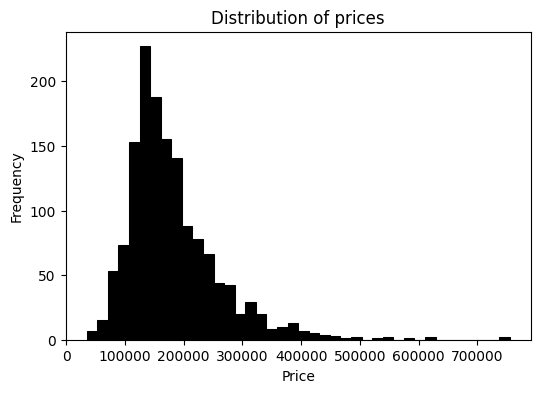

In [56]:
plt.figure(figsize=(6, 4))

sns.histplot(df.SalePrice, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

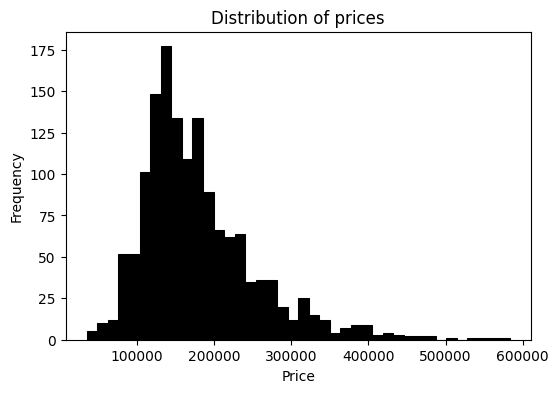

In [57]:
plt.figure(figsize=(6, 4))

sns.histplot(df.SalePrice[df.SalePrice < 600000], bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

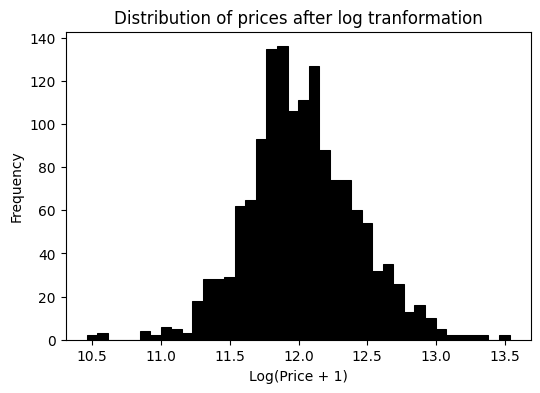

In [58]:
log_price = np.log1p(df.SalePrice)

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

In [59]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

Distribution of price

Validation Framework

Already have train and test data.

Usually we will divide 60-20-20. Validation 20, Test 20, and train 60.

Here we will take

In [60]:
np.random.seed(2)
n = len(df)

n_val = int(0.2*n)
n_train = n -n_val

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()


In [61]:
y_train_orig = df_train.SalePrice.values
y_val_orig = df_val.SalePrice.values

y_train = np.log1p(df_train.SalePrice.values)
y_val = np.log1p(df_val.SalePrice.values)

del df_train['SalePrice']
del df_val['SalePrice']

Linear Regression

w = (XTX)-1XTy
Where XtX is the Gram Matrix

Generally people use sklearn or get weight value from x and y matrix.


In [62]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

Baseline Solution

In [63]:
df_train.iloc[10]

MSSubClass           20
MSZoning             rl
LotFrontage         NaN
LotArea           16635
Street             pave
                  ...  
MiscVal               0
MoSold                6
YrSold             2009
SaleType             wd
SaleCondition    normal
Name: 421, Length: 79, dtype: object

In [73]:
df_train.GrLivArea.head()

503     1801
101     1732
608     3194
1089    1247
819     1358
Name: GrLivArea, dtype: int64

In [87]:
df_train.Fence.head()

503     gdwo
101      NaN
608      NaN
1089     NaN
819      NaN
Name: Fence, dtype: object

In [88]:
base=['LotArea', 'YearBuilt', 'YearRemodAdd', 'YrSold']

In [74]:
#base = [ 'LotArea', 'Neighborhood', 'BldgType','YearBuilt', 'YearRemodAdd','GrLivArea',  ' GarageArea', 'Fence',  'MoSold', 'YrSold', 'SaleCondition']

In [92]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [93]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [94]:
y_pred = w_0 + X_train.dot(w)

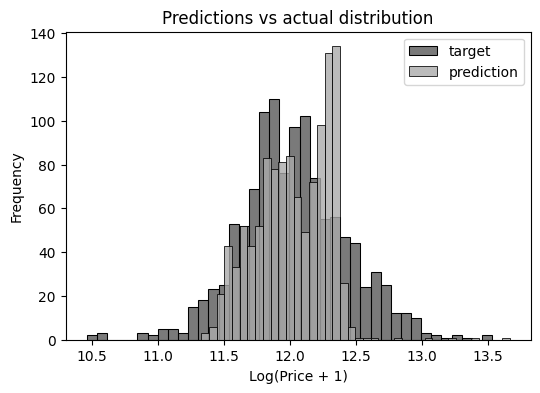

In [95]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [96]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [98]:
rmse(y_train, y_pred)

0.29496636471519466

In [99]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

In [100]:
rmse(y_val, y_pred)

0.2590511552492378

Simple feature engineering

Regularization

Using the model